In [1]:
# https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerLine2D

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titaniccleaningfeatureengineering/__results__.html
/kaggle/input/titaniccleaningfeatureengineering/testC.csv
/kaggle/input/titaniccleaningfeatureengineering/__notebook__.ipynb
/kaggle/input/titaniccleaningfeatureengineering/custom.css
/kaggle/input/titaniccleaningfeatureengineering/trainC.csv
/kaggle/input/titaniccleaningfeatureengineering/__output__.json
/kaggle/input/titaniccleaningfeatureengineering/__results___files/__results___13_0.png


In [3]:
train = pd.read_csv('../input/titaniccleaningfeatureengineering/trainC.csv')
test = pd.read_csv('../input/titaniccleaningfeatureengineering/testC.csv')
submission = pd.read_csv('../input/titanic/gender_submission.csv')

X = train[train.columns[1:]]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# baseline with default parameters
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions = dtc.predict(X_test)
print('The accuracy of the Decision Tree Classifier is',metrics.accuracy_score(predictions,y_test))

The accuracy of the Decision Tree Classifier is 0.9162011173184358


In [5]:
submission['Survived'] = dtc.predict(test)
submission.to_csv("submission_baseline.csv", index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


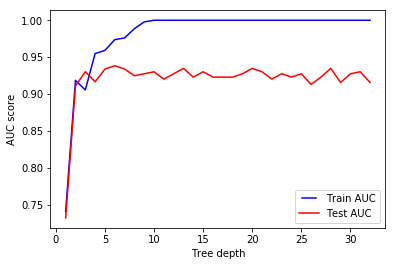

In [6]:
# max_depth
# how deep the tree can be (The deeper the tree, the more splits it has and it captures more information about the data.)

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

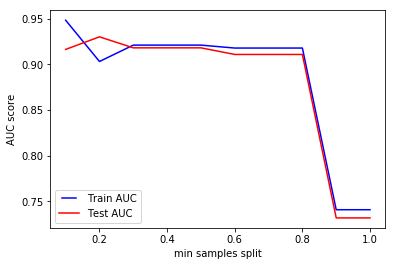

In [7]:
# min_samples_split
# represents the minimum number of samples required to split an internal node

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

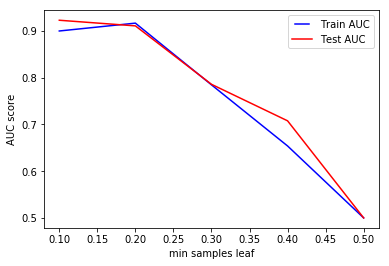

In [8]:
# min_samples_leaf
# the minimum number of samples required to be at a leaf node

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

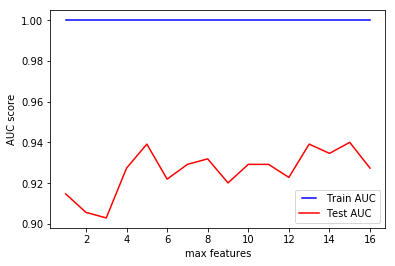

In [9]:
# max_features
# represents the number of features to consider when looking for the best split

max_features = list(range(1,train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [10]:
max_depths = [1, 2, 3, 4, 5, 6]
min_samples_splits = [0.4, 0.5, 0.6, 0.8]
min_samples_leafs = [0.15, 0.20, 0.25]
max_features = [6, 8, 10, 12, 14]

params = {'max_depth' : max_depths, 'min_samples_split' : min_samples_splits, 'min_samples_leaf' : min_samples_leafs, 'max_features' : max_features}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=cv, verbose = False, n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_

In [11]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.9082089552238806
{'max_depth': 4, 'max_features': 14, 'min_samples_leaf': 0.15, 'min_samples_split': 0.4}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.15, min_samples_split=0.4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [12]:
dtc_grid = grid.best_estimator_
dtc_grid.score(X,y)

0.9012345679012346

In [13]:
submission['Survived'] = dtc_grid.predict(test)
submission.to_csv("submission_gridsearchCV.csv", index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
